## Maldist Model

Here we are going to follow the Maldist model by dividing the dataset into 4 classes Benign, Dridex, Emotet and Hacintor
But first we need to balanced the data
After that we can train our several models and compare their Accuracy, Precision, Recall and F1-Score
Then we can do a confussion matrix

We are going to balanced the data by multiplying loss for each individual sample with its class inverse number of samples (INS)

INS = 1/#sample from class

In [1]:
import pandas as pd
import numpy as np

dridex = pd.read_csv("../Datasets/Dridex.csv", sep=",")
emotet = pd.read_csv("../Datasets/Emotet.csv", sep=",")
hancitor = pd.read_csv("../Datasets/Hancitor.csv", sep=",")
valak = pd.read_csv("../Datasets/Valak.csv", sep=",")
benign = pd.read_csv("../Datasets/Benign.csv", sep=",")

print(f"The shape of the dridex dataset is {dridex.shape[0]} samples, {dridex.shape[1]} features")
print(f"The shape of the emotet dataset is {emotet.shape[0]} samples, {emotet.shape[1]} features")
print(f"The shape of the hancitor dataset is {hancitor.shape[0]} samples, {hancitor.shape[1]} features")
print(f"The shape of the valak dataset is {valak.shape[0]} samples, {valak.shape[1]} features")
print(f"The shape of the benign dataset is {benign.shape[0]} samples, {benign.shape[1]} features")

The shape of the dridex dataset is 1987 samples, 337 features
The shape of the emotet dataset is 5597 samples, 337 features
The shape of the hancitor dataset is 58431 samples, 337 features
The shape of the valak dataset is 1151 samples, 337 features
The shape of the benign dataset is 3050 samples, 337 features


In [2]:
data = pd.read_csv("../Datasets/MalDist_Dataset.csv", sep=",")

mal = data[data['label'] == 1].drop(columns=['label'])
legit = data[data['label'] == 0].drop(columns=['label'])

print(f"The shape of the legit dataset is {legit.shape[0]} samples, {legit.shape[1]} features")
print(f"The shape of the mal dataset is {mal.shape[0]} samples, {mal.shape[1]} features")

The shape of the legit dataset is 3050 samples, 336 features
The shape of the mal dataset is 67166 samples, 336 features


/tmp/ipykernel_477948/2768450220.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='family', data=data, palette='viridis')


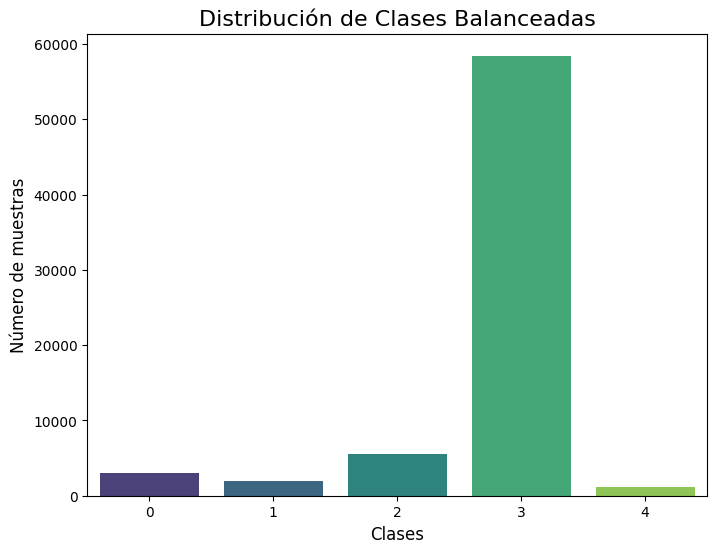

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot para mostrar la distribución de clases
plt.figure(figsize=(8, 6))
sns.countplot(x='family', data=data, palette='viridis')
plt.title('Distribución de Clases Balanceadas', fontsize=16)
plt.xlabel('Clases', fontsize=12)
plt.ylabel('Número de muestras', fontsize=12)
plt.show()

### Random Forest

In [14]:


custom_weights = {cls: data.shape[0] / data[data['family'] == cls].shape[0] for cls in data['family'].unique()}

print(custom_weights)

{0: 23.021639344262294, 1: 35.33769501761449, 2: 12.545292120778988, 3: 1.2016908832640207, 4: 61.004344048653344}


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

X = data.drop(columns=['family', 'label', 'file_name'])
y = data['family']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classif = RandomForestClassifier(class_weight=custom_weights, random_state=42)

classif.fit(X_train, y_train)

y_pred = classif.predict(X_test)

In [16]:
print(f"The score of the algorithm: {classif.score(X_test,y_test)*100}")

The score of the algorithm: 99.25234975790373


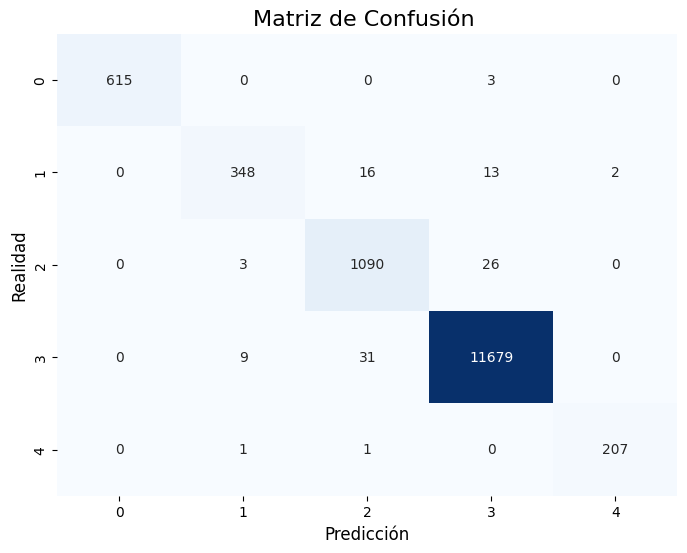

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['family'].unique(), yticklabels=data['family'].unique(), cbar=False)
plt.title('Matriz de Confusión ', fontsize=16)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Realidad', fontsize=12)
plt.show()

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Puedes usar 'micro', 'macro', 'weighted' 
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9925
Precision: 0.9817
Recall: 0.9749
F1 Score: 0.9782


### Gradient Boosting